In [1]:

import geopandas as gp
import networkx as nx
import numpy as np
import scipy.linalg
import scipy.stats
import matplotlib.pyplot as plt
import time
from IPython import display 



# as convention, these cells are numbered (row,col) with (0,0) in the top left and (3,3) in the bottom right
parts = [[[(3, 0), (3, 1), (3, 2), (3, 3)], [(2, 3), (2, 2), (2, 1), (2, 0)], [(1, 3), (1, 2), (1, 1), (1, 0)], [(0, 3), (0, 2), (0, 1), (0, 0)]], [[(3, 1), (3, 2), (3, 3), (2, 3)], [(3, 0), (2, 2), (2, 1), (2, 0)], [(1, 3), (1, 2), (1, 1), (1, 0)], [(0, 3), (0, 2), (0, 1), (0, 0)]], [[(3, 2), (3, 3), (2, 3), (2, 2)], [(3, 1), (3, 0), (2, 1), (2, 0)], [(1, 3), (1, 2), (1, 1), (1, 0)], [(0, 3), (0, 2), (0, 1), (0, 0)]], [[(3, 2), (3, 1), (3, 0), (2, 0)], [(3, 3), (2, 3), (2, 2), (2, 1)], [(1, 3), (1, 2), (1, 1), (1, 0)], [(0, 3), (0, 2), (0, 1), (0, 0)]], [[(3, 0), (3, 1), (3, 2), (3, 3)], [(2, 3), (2, 2), (2, 1), (1, 3)], [(2, 0), (1, 2), (1, 1), (1, 0)], [(0, 3), (0, 2), (0, 1), (0, 0)]], [[(3, 2), (3, 3), (2, 3), (1, 3)], [(3, 1), (3, 0), (2, 2), (2, 1)], [(2, 0), (1, 2), (1, 1), (1, 0)], [(0, 3), (0, 2), (0, 1), (0, 0)]], [[(3, 2), (3, 1), (3, 0), (2, 1)], [(3, 3), (2, 3), (2, 2), (1, 3)], [(2, 0), (1, 2), (1, 1), (1, 0)], [(0, 3), (0, 2), (0, 1), (0, 0)]], [[(3, 0), (3, 1), (3, 2), (3, 3)], [(2, 3), (2, 2), (1, 3), (1, 2)], [(2, 1), (2, 0), (1, 1), (1, 0)], [(0, 3), (0, 2), (0, 1), (0, 0)]], [[(3, 2), (3, 3), (2, 3), (2, 2)], [(3, 1), (3, 0), (2, 0), (1, 0)], [(2, 1), (1, 3), (1, 2), (1, 1)], [(0, 3), (0, 2), (0, 1), (0, 0)]], [[(3, 2), (3, 1), (3, 0), (2, 2)], [(3, 3), (2, 3), (1, 3), (1, 2)], [(2, 1), (2, 0), (1, 1), (1, 0)], [(0, 3), (0, 2), (0, 1), (0, 0)]], [[(3, 2), (3, 1), (3, 0), (2, 0)], [(3, 3), (2, 3), (2, 2), (1, 3)], [(2, 1), (1, 2), (1, 1), (1, 0)], [(0, 3), (0, 2), (0, 1), (0, 0)]], [[(3, 0), (3, 1), (3, 2), (3, 3)], [(2, 3), (1, 3), (1, 2), (1, 1)], [(2, 2), (2, 1), (2, 0), (1, 0)], [(0, 3), (0, 2), (0, 1), (0, 0)]], [[(3, 1), (3, 2), (3, 3), (2, 3)], [(3, 0), (2, 1), (2, 0), (1, 0)], [(2, 2), (1, 3), (1, 2), (1, 1)], [(0, 3), (0, 2), (0, 1), (0, 0)]], [[(3, 1), (3, 2), (3, 3), (2, 3)], [(3, 0), (2, 0), (1, 1), (1, 0)], [(2, 2), (2, 1), (1, 3), (1, 2)], [(0, 3), (0, 2), (0, 1), (0, 0)]], [[(3, 2), (3, 3), (2, 3), (1, 3)], [(3, 1), (3, 0), (2, 1), (2, 0)], [(2, 2), (1, 2), (1, 1), (1, 0)], [(0, 3), (0, 2), (0, 1), (0, 0)]], [[(3, 2), (3, 3), (2, 3), (1, 3)], [(3, 1), (3, 0), (2, 0), (1, 0)], [(2, 2), (2, 1), (1, 2), (1, 1)], [(0, 3), (0, 2), (0, 1), (0, 0)]], [[(3, 2), (3, 1), (3, 0), (2, 0)], [(3, 3), (2, 3), (1, 3), (1, 2)], [(2, 2), (2, 1), (1, 1), (1, 0)], [(0, 3), (0, 2), (0, 1), (0, 0)]], [[(3, 1), (3, 2), (3, 3), (2, 2)], [(3, 0), (2, 1), (2, 0), (1, 0)], [(2, 3), (1, 3), (1, 2), (1, 1)], [(0, 3), (0, 2), (0, 1), (0, 0)]], [[(3, 1), (3, 2), (3, 3), (2, 1)], [(3, 0), (2, 0), (1, 1), (1, 0)], [(2, 3), (2, 2), (1, 3), (1, 2)], [(0, 3), (0, 2), (0, 1), (0, 0)]], [[(3, 2), (3, 3), (2, 2), (2, 1)], [(3, 1), (3, 0), (2, 0), (1, 0)], [(2, 3), (1, 3), (1, 2), (1, 1)], [(0, 3), (0, 2), (0, 1), (0, 0)]], [[(3, 2), (3, 3), (2, 3), (1, 3)], [(3, 1), (2, 2), (2, 1), (1, 2)], [(3, 0), (2, 0), (1, 1), (1, 0)], [(0, 3), (0, 2), (0, 1), (0, 0)]], [[(3, 2), (3, 1), (2, 2), (2, 1)], [(3, 3), (2, 3), (1, 3), (1, 2)], [(3, 0), (2, 0), (1, 1), (1, 0)], [(0, 3), (0, 2), (0, 1), (0, 0)]], [[(3, 1), (3, 0), (2, 0), (1, 0)], [(3, 2), (2, 2), (2, 1), (1, 1)], [(3, 3), (2, 3), (1, 3), (1, 2)], [(0, 3), (0, 2), (0, 1), (0, 0)]], [[(3, 0), (3, 1), (3, 2), (3, 3)], [(2, 3), (2, 2), (2, 1), (2, 0)], [(1, 3), (1, 2), (1, 1), (0, 3)], [(1, 0), (0, 2), (0, 1), (0, 0)]], [[(3, 1), (3, 2), (3, 3), (2, 3)], [(3, 0), (2, 2), (2, 1), (2, 0)], [(1, 3), (1, 2), (1, 1), (0, 3)], [(1, 0), (0, 2), (0, 1), (0, 0)]], [[(3, 2), (3, 3), (2, 3), (2, 2)], [(3, 1), (3, 0), (2, 1), (2, 0)], [(1, 3), (1, 2), (1, 1), (0, 3)], [(1, 0), (0, 2), (0, 1), (0, 0)]], [[(3, 2), (3, 1), (3, 0), (2, 0)], [(3, 3), (2, 3), (2, 2), (2, 1)], [(1, 3), (1, 2), (1, 1), (0, 3)], [(1, 0), (0, 2), (0, 1), (0, 0)]], [[(3, 0), (3, 1), (3, 2), (3, 3)], [(2, 3), (2, 2), (1, 3), (0, 3)], [(2, 1), (2, 0), (1, 2), (1, 1)], [(1, 0), (0, 2), (0, 1), (0, 0)]], [[(3, 2), (3, 1), (3, 0), (2, 2)], [(3, 3), (2, 3), (1, 3), (0, 3)], [(2, 1), (2, 0), (1, 2), (1, 1)], [(1, 0), (0, 2), (0, 1), (0, 0)]], [[(3, 0), (3, 1), (3, 2), (3, 3)], [(2, 3), (1, 3), (1, 2), (0, 3)], [(2, 2), (2, 1), (2, 0), (1, 1)], [(1, 0), (0, 2), (0, 1), (0, 0)]], [[(3, 1), (3, 2), (3, 3), (2, 3)], [(3, 0), (2, 1), (2, 0), (1, 1)], [(2, 2), (1, 3), (1, 2), (0, 3)], [(1, 0), (0, 2), (0, 1), (0, 0)]], [[(3, 2), (3, 1), (3, 0), (2, 0)], [(3, 3), (2, 3), (1, 3), (0, 3)], [(2, 2), (2, 1), (1, 2), (1, 1)], [(1, 0), (0, 2), (0, 1), (0, 0)]], [[(3, 1), (3, 2), (3, 3), (2, 2)], [(3, 0), (2, 1), (2, 0), (1, 1)], [(2, 3), (1, 3), (1, 2), (0, 3)], [(1, 0), (0, 2), (0, 1), (0, 0)]], [[(3, 2), (3, 1), (2, 2), (1, 2)], [(3, 3), (2, 3), (1, 3), (0, 3)], [(3, 0), (2, 1), (2, 0), (1, 1)], [(1, 0), (0, 2), (0, 1), (0, 0)]], [[(3, 1), (3, 0), (2, 1), (2, 0)], [(3, 2), (2, 2), (1, 2), (1, 1)], [(3, 3), (2, 3), (1, 3), (0, 3)], [(1, 0), (0, 2), (0, 1), (0, 0)]], [[(3, 0), (3, 1), (3, 2), (3, 3)], [(2, 3), (2, 2), (2, 1), (2, 0)], [(1, 3), (1, 2), (0, 3), (0, 2)], [(1, 1), (1, 0), (0, 1), (0, 0)]], [[(3, 1), (3, 2), (3, 3), (2, 3)], [(3, 0), (2, 2), (2, 1), (2, 0)], [(1, 3), (1, 2), (0, 3), (0, 2)], [(1, 1), (1, 0), (0, 1), (0, 0)]], [[(3, 2), (3, 3), (2, 3), (2, 2)], [(3, 1), (3, 0), (2, 1), (2, 0)], [(1, 3), (1, 2), (0, 3), (0, 2)], [(1, 1), (1, 0), (0, 1), (0, 0)]], [[(3, 2), (3, 1), (3, 0), (2, 0)], [(3, 3), (2, 3), (2, 2), (2, 1)], [(1, 3), (1, 2), (0, 3), (0, 2)], [(1, 1), (1, 0), (0, 1), (0, 0)]], [[(3, 0), (3, 1), (3, 2), (3, 3)], [(2, 3), (2, 2), (1, 3), (1, 2)], [(2, 1), (2, 0), (1, 0), (0, 0)], [(1, 1), (0, 3), (0, 2), (0, 1)]], [[(3, 2), (3, 1), (3, 0), (2, 2)], [(3, 3), (2, 3), (1, 3), (1, 2)], [(2, 1), (2, 0), (1, 0), (0, 0)], [(1, 1), (0, 3), (0, 2), (0, 1)]], [[(3, 0), (3, 1), (3, 2), (3, 3)], [(2, 3), (1, 3), (1, 2), (0, 3)], [(2, 2), (2, 1), (2, 0), (1, 0)], [(1, 1), (0, 2), (0, 1), (0, 0)]], [[(3, 0), (3, 1), (3, 2), (3, 3)], [(2, 3), (1, 3), (0, 3), (0, 2)], [(2, 2), (2, 1), (2, 0), (1, 2)], [(1, 1), (1, 0), (0, 1), (0, 0)]], [[(3, 1), (3, 2), (3, 3), (2, 3)], [(3, 0), (2, 1), (2, 0), (1, 0)], [(2, 2), (1, 3), (1, 2), (0, 3)], [(1, 1), (0, 2), (0, 1), (0, 0)]], [[(3, 1), (3, 2), (3, 3), (2, 3)], [(3, 0), (2, 0), (1, 0), (0, 0)], [(2, 2), (2, 1), (1, 3), (1, 2)], [(1, 1), (0, 3), (0, 2), (0, 1)]], [[(3, 2), (3, 3), (2, 3), (1, 3)], [(3, 1), (3, 0), (2, 1), (2, 0)], [(2, 2), (1, 2), (0, 3), (0, 2)], [(1, 1), (1, 0), (0, 1), (0, 0)]], [[(3, 2), (3, 1), (3, 0), (2, 0)], [(3, 3), (2, 3), (1, 3), (0, 3)], [(2, 2), (2, 1), (1, 2), (0, 2)], [(1, 1), (1, 0), (0, 1), (0, 0)]], [[(3, 1), (3, 2), (3, 3), (2, 2)], [(3, 0), (2, 1), (2, 0), (1, 0)], [(2, 3), (1, 3), (1, 2), (0, 3)], [(1, 1), (0, 2), (0, 1), (0, 0)]], [[(3, 1), (3, 2), (3, 3), (2, 1)], [(3, 0), (2, 0), (1, 0), (0, 0)], [(2, 3), (2, 2), (1, 3), (1, 2)], [(1, 1), (0, 3), (0, 2), (0, 1)]], [[(3, 2), (3, 3), (2, 2), (2, 1)], [(3, 1), (3, 0), (2, 0), (1, 0)], [(2, 3), (1, 3), (1, 2), (0, 3)], [(1, 1), (0, 2), (0, 1), (0, 0)]], [[(3, 2), (3, 3), (2, 2), (1, 2)], [(3, 1), (3, 0), (2, 1), (2, 0)], [(2, 3), (1, 3), (0, 3), (0, 2)], [(1, 1), (1, 0), (0, 1), (0, 0)]], [[(3, 2), (3, 3), (2, 3), (1, 3)], [(3, 1), (2, 2), (2, 1), (1, 2)], [(3, 0), (2, 0), (1, 0), (0, 0)], [(1, 1), (0, 3), (0, 2), (0, 1)]], [[(3, 2), (3, 1), (2, 2), (2, 1)], [(3, 3), (2, 3), (1, 3), (1, 2)], [(3, 0), (2, 0), (1, 0), (0, 0)], [(1, 1), (0, 3), (0, 2), (0, 1)]], [[(3, 2), (3, 1), (2, 2), (1, 2)], [(3, 3), (2, 3), (1, 3), (0, 3)], [(3, 0), (2, 1), (2, 0), (1, 0)], [(1, 1), (0, 2), (0, 1), (0, 0)]], [[(3, 1), (3, 0), (2, 1), (2, 0)], [(3, 2), (2, 2), (1, 2), (0, 2)], [(3, 3), (2, 3), (1, 3), (0, 3)], [(1, 1), (1, 0), (0, 1), (0, 0)]], [[(3, 1), (3, 0), (2, 0), (1, 0)], [(3, 2), (2, 2), (2, 1), (1, 2)], [(3, 3), (2, 3), (1, 3), (0, 3)], [(1, 1), (0, 2), (0, 1), (0, 0)]], [[(3, 0), (3, 1), (3, 2), (3, 3)], [(2, 3), (2, 2), (2, 1), (2, 0)], [(1, 3), (0, 3), (0, 2), (0, 1)], [(1, 2), (1, 1), (1, 0), (0, 0)]], [[(3, 1), (3, 2), (3, 3), (2, 3)], [(3, 0), (2, 2), (2, 1), (2, 0)], [(1, 3), (0, 3), (0, 2), (0, 1)], [(1, 2), (1, 1), (1, 0), (0, 0)]], [[(3, 2), (3, 3), (2, 3), (2, 2)], [(3, 1), (3, 0), (2, 1), (2, 0)], [(1, 3), (0, 3), (0, 2), (0, 1)], [(1, 2), (1, 1), (1, 0), (0, 0)]], [[(3, 2), (3, 1), (3, 0), (2, 0)], [(3, 3), (2, 3), (2, 2), (2, 1)], [(1, 3), (0, 3), (0, 2), (0, 1)], [(1, 2), (1, 1), (1, 0), (0, 0)]], [[(3, 0), (3, 1), (3, 2), (3, 3)], [(2, 3), (2, 2), (2, 1), (1, 3)], [(2, 0), (1, 1), (1, 0), (0, 0)], [(1, 2), (0, 3), (0, 2), (0, 1)]], [[(3, 0), (3, 1), (3, 2), (3, 3)], [(2, 3), (2, 2), (2, 1), (1, 3)], [(2, 0), (1, 0), (0, 1), (0, 0)], [(1, 2), (1, 1), (0, 3), (0, 2)]], [[(3, 2), (3, 3), (2, 3), (1, 3)], [(3, 1), (3, 0), (2, 2), (2, 1)], [(2, 0), (1, 1), (1, 0), (0, 0)], [(1, 2), (0, 3), (0, 2), (0, 1)]], [[(3, 2), (3, 3), (2, 3), (1, 3)], [(3, 1), (3, 0), (2, 2), (2, 1)], [(2, 0), (1, 0), (0, 1), (0, 0)], [(1, 2), (1, 1), (0, 3), (0, 2)]], [[(3, 2), (3, 1), (3, 0), (2, 1)], [(3, 3), (2, 3), (2, 2), (1, 3)], [(2, 0), (1, 1), (1, 0), (0, 0)], [(1, 2), (0, 3), (0, 2), (0, 1)]], [[(3, 2), (3, 1), (3, 0), (2, 1)], [(3, 3), (2, 3), (2, 2), (1, 3)], [(2, 0), (1, 0), (0, 1), (0, 0)], [(1, 2), (1, 1), (0, 3), (0, 2)]], [[(3, 0), (3, 1), (3, 2), (3, 3)], [(2, 3), (2, 2), (1, 3), (0, 3)], [(2, 1), (2, 0), (1, 1), (1, 0)], [(1, 2), (0, 2), (0, 1), (0, 0)]], [[(3, 0), (3, 1), (3, 2), (3, 3)], [(2, 3), (2, 2), (1, 3), (0, 3)], [(2, 1), (2, 0), (1, 0), (0, 0)], [(1, 2), (1, 1), (0, 2), (0, 1)]], [[(3, 2), (3, 1), (3, 0), (2, 2)], [(3, 3), (2, 3), (1, 3), (0, 3)], [(2, 1), (2, 0), (1, 1), (1, 0)], [(1, 2), (0, 2), (0, 1), (0, 0)]], [[(3, 2), (3, 1), (3, 0), (2, 2)], [(3, 3), (2, 3), (1, 3), (0, 3)], [(2, 1), (2, 0), (1, 0), (0, 0)], [(1, 2), (1, 1), (0, 2), (0, 1)]], [[(3, 2), (3, 1), (3, 0), (2, 0)], [(3, 3), (2, 3), (2, 2), (1, 3)], [(2, 1), (1, 1), (1, 0), (0, 0)], [(1, 2), (0, 3), (0, 2), (0, 1)]], [[(3, 0), (3, 1), (3, 2), (3, 3)], [(2, 3), (1, 3), (0, 3), (0, 2)], [(2, 2), (2, 1), (2, 0), (1, 0)], [(1, 2), (1, 1), (0, 1), (0, 0)]], [[(3, 2), (3, 1), (3, 0), (2, 0)], [(3, 3), (2, 3), (1, 3), (0, 3)], [(2, 2), (2, 1), (1, 1), (1, 0)], [(1, 2), (0, 2), (0, 1), (0, 0)]], [[(3, 1), (3, 2), (3, 3), (2, 2)], [(3, 0), (2, 1), (2, 0), (1, 0)], [(2, 3), (1, 3), (0, 3), (0, 2)], [(1, 2), (1, 1), (0, 1), (0, 0)]], [[(3, 1), (3, 2), (3, 3), (2, 1)], [(3, 0), (2, 0), (1, 1), (1, 0)], [(2, 3), (2, 2), (1, 3), (0, 3)], [(1, 2), (0, 2), (0, 1), (0, 0)]], [[(3, 1), (3, 2), (3, 3), (2, 1)], [(3, 0), (2, 0), (1, 0), (0, 0)], [(2, 3), (2, 2), (1, 3), (0, 3)], [(1, 2), (1, 1), (0, 2), (0, 1)]], [[(3, 2), (3, 3), (2, 2), (2, 1)], [(3, 1), (3, 0), (2, 0), (1, 0)], [(2, 3), (1, 3), (0, 3), (0, 2)], [(1, 2), (1, 1), (0, 1), (0, 0)]], [[(3, 2), (3, 3), (2, 3), (1, 3)], [(3, 1), (2, 2), (2, 1), (1, 1)], [(3, 0), (2, 0), (1, 0), (0, 0)], [(1, 2), (0, 3), (0, 2), (0, 1)]], [[(3, 2), (3, 1), (2, 2), (2, 1)], [(3, 3), (2, 3), (1, 3), (0, 3)], [(3, 0), (2, 0), (1, 1), (1, 0)], [(1, 2), (0, 2), (0, 1), (0, 0)]], [[(3, 2), (3, 1), (2, 2), (2, 1)], [(3, 3), (2, 3), (1, 3), (0, 3)], [(3, 0), (2, 0), (1, 0), (0, 0)], [(1, 2), (1, 1), (0, 2), (0, 1)]], [[(3, 2), (3, 1), (2, 1), (1, 1)], [(3, 3), (2, 3), (2, 2), (1, 3)], [(3, 0), (2, 0), (1, 0), (0, 0)], [(1, 2), (0, 3), (0, 2), (0, 1)]], [[(3, 1), (3, 0), (2, 0), (1, 0)], [(3, 2), (2, 2), (2, 1), (1, 1)], [(3, 3), (2, 3), (1, 3), (0, 3)], [(1, 2), (0, 2), (0, 1), (0, 0)]], [[(3, 0), (3, 1), (3, 2), (3, 3)], [(2, 3), (2, 2), (2, 1), (1, 2)], [(2, 0), (1, 1), (1, 0), (0, 0)], [(1, 3), (0, 3), (0, 2), (0, 1)]], [[(3, 0), (3, 1), (3, 2), (3, 3)], [(2, 3), (2, 2), (2, 1), (1, 1)], [(2, 0), (1, 0), (0, 1), (0, 0)], [(1, 3), (1, 2), (0, 3), (0, 2)]], [[(3, 2), (3, 3), (2, 3), (2, 2)], [(3, 1), (3, 0), (2, 1), (1, 1)], [(2, 0), (1, 0), (0, 1), (0, 0)], [(1, 3), (1, 2), (0, 3), (0, 2)]], [[(3, 2), (3, 1), (3, 0), (2, 1)], [(3, 3), (2, 3), (2, 2), (1, 2)], [(2, 0), (1, 1), (1, 0), (0, 0)], [(1, 3), (0, 3), (0, 2), (0, 1)]], [[(3, 0), (3, 1), (3, 2), (3, 3)], [(2, 3), (2, 2), (1, 2), (1, 1)], [(2, 1), (2, 0), (1, 0), (0, 0)], [(1, 3), (0, 3), (0, 2), (0, 1)]], [[(3, 2), (3, 3), (2, 3), (2, 2)], [(3, 1), (3, 0), (2, 0), (1, 0)], [(2, 1), (1, 1), (0, 1), (0, 0)], [(1, 3), (1, 2), (0, 3), (0, 2)]], [[(3, 2), (3, 1), (3, 0), (2, 0)], [(3, 3), (2, 3), (2, 2), (1, 2)], [(2, 1), (1, 1), (1, 0), (0, 0)], [(1, 3), (0, 3), (0, 2), (0, 1)]], [[(3, 1), (3, 2), (3, 3), (2, 3)], [(3, 0), (2, 0), (1, 0), (0, 0)], [(2, 2), (2, 1), (1, 2), (1, 1)], [(1, 3), (0, 3), (0, 2), (0, 1)]], [[(3, 1), (3, 2), (3, 3), (2, 3)], [(3, 0), (2, 0), (1, 0), (0, 0)], [(2, 2), (2, 1), (1, 1), (0, 1)], [(1, 3), (1, 2), (0, 3), (0, 2)]], [[(3, 1), (3, 2), (3, 3), (2, 1)], [(3, 0), (2, 0), (1, 0), (0, 0)], [(2, 3), (2, 2), (1, 2), (1, 1)], [(1, 3), (0, 3), (0, 2), (0, 1)]], [[(3, 2), (3, 3), (2, 3), (2, 2)], [(3, 1), (2, 1), (1, 2), (1, 1)], [(3, 0), (2, 0), (1, 0), (0, 0)], [(1, 3), (0, 3), (0, 2), (0, 1)]], [[(3, 2), (3, 3), (2, 3), (2, 2)], [(3, 1), (2, 1), (1, 1), (0, 1)], [(3, 0), (2, 0), (1, 0), (0, 0)], [(1, 3), (1, 2), (0, 3), (0, 2)]], [[(3, 2), (3, 1), (2, 1), (1, 1)], [(3, 3), (2, 3), (2, 2), (1, 2)], [(3, 0), (2, 0), (1, 0), (0, 0)], [(1, 3), (0, 3), (0, 2), (0, 1)]], [[(3, 0), (3, 1), (3, 2), (3, 3)], [(2, 3), (2, 2), (1, 3), (0, 3)], [(2, 1), (1, 2), (1, 1), (0, 2)], [(2, 0), (1, 0), (0, 1), (0, 0)]], [[(3, 2), (3, 1), (3, 0), (2, 2)], [(3, 3), (2, 3), (1, 3), (0, 3)], [(2, 1), (1, 2), (1, 1), (0, 2)], [(2, 0), (1, 0), (0, 1), (0, 0)]], [[(3, 0), (3, 1), (3, 2), (3, 3)], [(2, 3), (1, 3), (0, 3), (0, 2)], [(2, 2), (2, 1), (1, 2), (1, 1)], [(2, 0), (1, 0), (0, 1), (0, 0)]], [[(3, 2), (3, 3), (2, 3), (1, 3)], [(3, 1), (3, 0), (2, 1), (1, 1)], [(2, 2), (1, 2), (0, 3), (0, 2)], [(2, 0), (1, 0), (0, 1), (0, 0)]], [[(3, 2), (3, 1), (3, 0), (2, 1)], [(3, 3), (2, 3), (1, 3), (0, 3)], [(2, 2), (1, 2), (1, 1), (0, 2)], [(2, 0), (1, 0), (0, 1), (0, 0)]], [[(3, 2), (3, 1), (3, 0), (2, 1)], [(3, 3), (2, 3), (1, 3), (0, 3)], [(2, 2), (1, 2), (0, 2), (0, 1)], [(2, 0), (1, 1), (1, 0), (0, 0)]], [[(3, 2), (3, 3), (2, 2), (1, 2)], [(3, 1), (3, 0), (2, 1), (1, 1)], [(2, 3), (1, 3), (0, 3), (0, 2)], [(2, 0), (1, 0), (0, 1), (0, 0)]], [[(3, 1), (3, 0), (2, 1), (1, 1)], [(3, 2), (2, 2), (1, 2), (0, 2)], [(3, 3), (2, 3), (1, 3), (0, 3)], [(2, 0), (1, 0), (0, 1), (0, 0)]], [[(3, 0), (3, 1), (3, 2), (3, 3)], [(2, 3), (1, 3), (0, 3), (0, 2)], [(2, 2), (1, 2), (1, 1), (0, 1)], [(2, 1), (2, 0), (1, 0), (0, 0)]], [[(3, 1), (3, 2), (3, 3), (2, 3)], [(3, 0), (2, 0), (1, 0), (0, 0)], [(2, 2), (1, 3), (1, 2), (0, 3)], [(2, 1), (1, 1), (0, 2), (0, 1)]], [[(3, 2), (3, 3), (2, 3), (1, 3)], [(3, 1), (3, 0), (2, 0), (1, 0)], [(2, 2), (1, 2), (0, 3), (0, 2)], [(2, 1), (1, 1), (0, 1), (0, 0)]], [[(3, 2), (3, 1), (3, 0), (2, 0)], [(3, 3), (2, 3), (1, 3), (0, 3)], [(2, 2), (1, 2), (0, 2), (0, 1)], [(2, 1), (1, 1), (1, 0), (0, 0)]], [[(3, 1), (3, 2), (3, 3), (2, 2)], [(3, 0), (2, 0), (1, 0), (0, 0)], [(2, 3), (1, 3), (1, 2), (0, 3)], [(2, 1), (1, 1), (0, 2), (0, 1)]], [[(3, 1), (3, 2), (3, 3), (2, 2)], [(3, 0), (2, 0), (1, 0), (0, 0)], [(2, 3), (1, 3), (0, 3), (0, 2)], [(2, 1), (1, 2), (1, 1), (0, 1)]], [[(3, 2), (3, 3), (2, 2), (1, 2)], [(3, 1), (3, 0), (2, 0), (1, 0)], [(2, 3), (1, 3), (0, 3), (0, 2)], [(2, 1), (1, 1), (0, 1), (0, 0)]], [[(3, 2), (3, 1), (2, 2), (1, 2)], [(3, 3), (2, 3), (1, 3), (0, 3)], [(3, 0), (2, 0), (1, 0), (0, 0)], [(2, 1), (1, 1), (0, 2), (0, 1)]], [[(3, 1), (3, 0), (2, 0), (1, 0)], [(3, 2), (2, 2), (1, 2), (0, 2)], [(3, 3), (2, 3), (1, 3), (0, 3)], [(2, 1), (1, 1), (0, 1), (0, 0)]], [[(3, 1), (3, 2), (3, 3), (2, 1)], [(3, 0), (2, 0), (1, 0), (0, 0)], [(2, 3), (1, 3), (0, 3), (0, 2)], [(2, 2), (1, 2), (1, 1), (0, 1)]], [[(3, 2), (3, 3), (2, 3), (1, 3)], [(3, 1), (2, 1), (1, 1), (0, 1)], [(3, 0), (2, 0), (1, 0), (0, 0)], [(2, 2), (1, 2), (0, 3), (0, 2)]], [[(3, 2), (3, 1), (2, 1), (1, 1)], [(3, 3), (2, 3), (1, 3), (0, 3)], [(3, 0), (2, 0), (1, 0), (0, 0)], [(2, 2), (1, 2), (0, 2), (0, 1)]], [[(3, 2), (3, 3), (2, 2), (1, 2)], [(3, 1), (2, 1), (1, 1), (0, 1)], [(3, 0), (2, 0), (1, 0), (0, 0)], [(2, 3), (1, 3), (0, 3), (0, 2)]], [[(3, 0), (2, 0), (1, 0), (0, 0)], [(3, 1), (2, 1), (1, 1), (0, 1)], [(3, 2), (2, 2), (1, 2), (0, 2)], [(3, 3), (2, 3), (1, 3), (0, 3)]]]

In [2]:
print(len(parts))

117


In [19]:
def part_to_mat(part):
    mat = np.zeros([16,16])

    for c in part:
        verts = []
        for t in c:
            verts.append(4*t[0]+t[1])
        verts.sort()
        
        for v in verts:
            if v%4!=3 and v+1 in verts:
                mat[v,v+1] = 1
                mat[v+1,v] = 1
            if v+4 in verts:
                mat[v,v+4] = 1
                mat[v+4,v] = 1
            
        
    return mat

part_to_mat(parts[0])

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

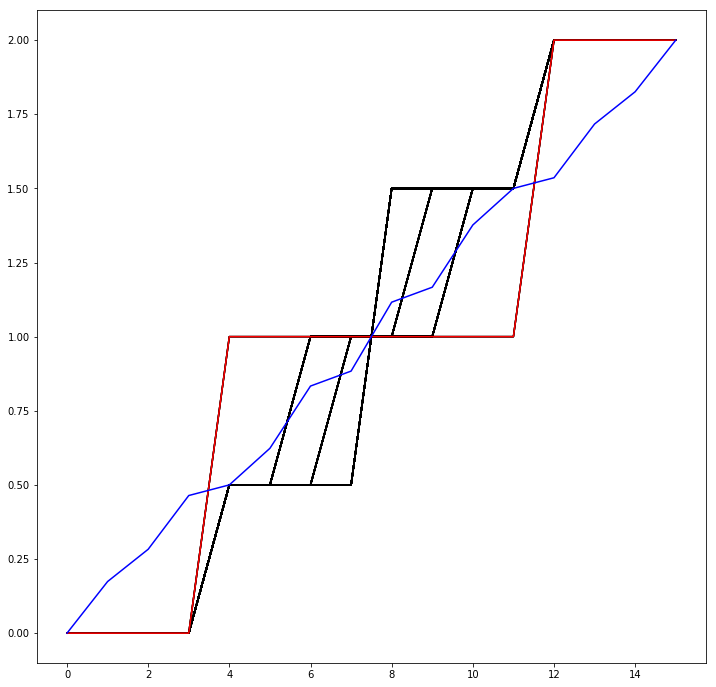

In [27]:
plt.figure(figsize=(12,12))
for g in parts:
    adj = part_to_mat(g)
    temp = nx.from_numpy_matrix(adj)
    lap = nx.normalized_laplacian_matrix(temp).todense()
    evals = np.real(scipy.linalg.eigvals(lap).tolist())
    evals.sort()
    
    plt.plot(range(len(evals)),evals,color='k')

    
cpt = np.zeros([4,4])
cpt[0,1] = 1
cpt[1,0] = 1
cpt[2,0] = 1
cpt[0,2] = 1
cpt[1,3] = 1
cpt[3,1] = 1
cpt[2,3] = 1
cpt[3,2] = 1
cpt = scipy.linalg.block_diag(cpt,cpt,cpt,cpt)

temp = nx.from_numpy_matrix(cpt)
lap = nx.normalized_laplacian_matrix(temp).todense()
evals = np.real(scipy.linalg.eigvals(lap).tolist())
evals.sort()
plt.plot(range(len(evals)),evals, color='r')

cpt = np.zeros([16,16])
for i in range(12):
    if i%4!=3:
        cpt[i,i+1] = 1
        cpt[i+1,i] = 1
    cpt[i,i+4] = 1
    cpt[i+4,i] = 1
temp = nx.from_numpy_matrix(cpt)
lap = nx.normalized_laplacian_matrix(temp).todense()
evals = np.real(scipy.linalg.eigvals(lap).tolist())
evals.sort()
plt.plot(range(len(evals)),evals, color='b')    

ON STEP 10000
ON STEP 20000
ON STEP 30000
ON STEP 40000
ON STEP 50000
ON STEP 60000
ON STEP 70000
ON STEP 80000
ON STEP 90000
ON STEP 100000


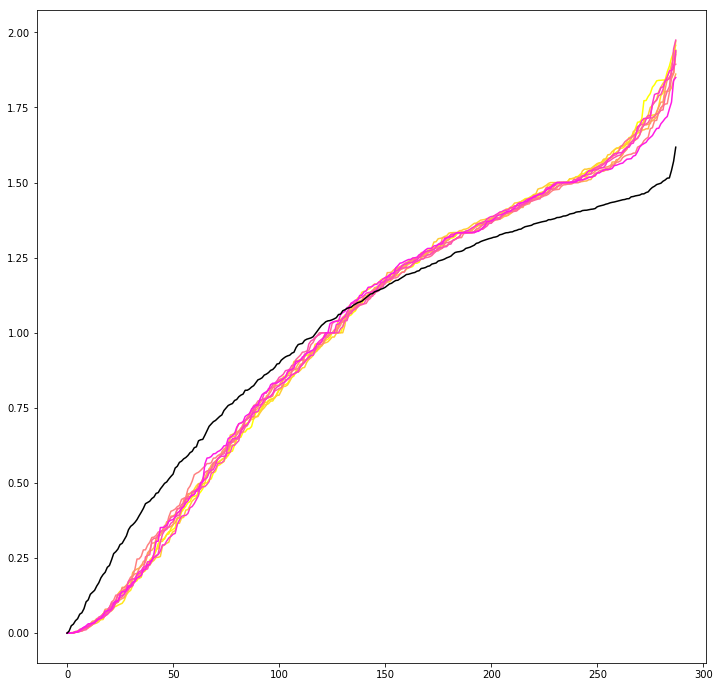

In [7]:
plt.figure(figsize=(12,12))
main(100000,10000)
